# OCR in python (optical character recogniztion)

## common workflow (sequential pipeline)
### PIL(pillow) => open an image
### OpenCV => Change an Image
### Tessereact (PyTesseract) => OCR an image

In [1]:
# we can manipulate the image with OpenCV

In [ ]:
#workflow Example
#1. convert big tabular image to single rows of images
#2. extract individual rows from table as image 
#3. pass file to Tesseract 

## bounding boxes
## Tablua library (cretain problems cannot be solved by tabula)
## every ocr problem is different in their own


### installation 

In [5]:
!pip install pillow


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\rajputkishor1973\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [2]:
!pip install opencv-python


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\rajputkishor1973\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\rajputkishor1973\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [6]:
!pip install numpy


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\rajputkishor1973\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [7]:
!pip install pytesseract



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\rajputkishor1973\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [1]:
import cv2
from PIL import Image
import pytesseract

## Preprocessing of Images for OCR

### 1. Using pillow library 

In [5]:
im_file = "./test_case1.png"  #path of img

im = Image.open(im_file)      #object creation
print(im)
print(im.size)
im.show()                     #to open image in photo viewer

# im.rotate(90).show()          #to rotate image

<PIL.PngImagePlugin.PngImageFile image mode=P size=225x225 at 0xF970E81910>
(225, 225)


In [10]:
# saving the image
im.save("temp/page_01.png")
altered_im = im.rotate(90)
altered_im.save("temp/altered.png")

### 2. Using OpenCV

### 0. Opening an Image

In [2]:
import cv2
import matplotlib.pyplot as plt
image_file = "./test_case1.png"
img = cv2.imread(image_file)

In [33]:
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)
    if(len(im_data.shape)==2):
        height , width = im_data.shape
    else:
        height , width , depth = im_data.shape
    
    # what size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi) , height / float(dpi)
    
    # create a figure of the right size with one axes that takes up the ull figure 
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0,0,1,1])
    
    # Hide spines, ticks etc.
    ax.axis('off')
    
    #display the image
    ax.imshow(im_data , cmap = 'gray')
    plt.show()

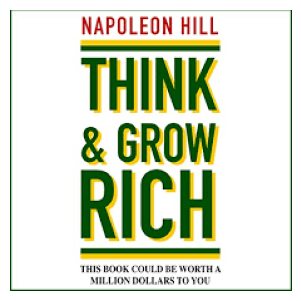

In [34]:
display(image_file)

### 1. Inverted Images

In [23]:
# white spectrum is black and vice versa 
inverted_image = cv2.bitwise_not(img)

cv2.imwrite("temp/inverted.png",inverted_image)               # saving syntax in opencv

True

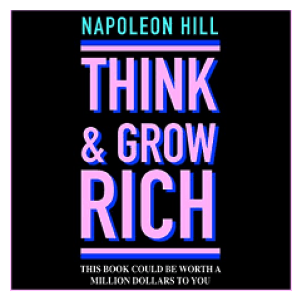

In [24]:
display('temp/inverted.png')

### 2. Rescaling

In [25]:
# 

### 3. Binarization

In [26]:
# requires image in greyscale
## function to convert image to grayscale
def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


In [27]:
gray_image = grayscale(img)
cv2.imwrite('temp/grayscale.png',gray_image)

True

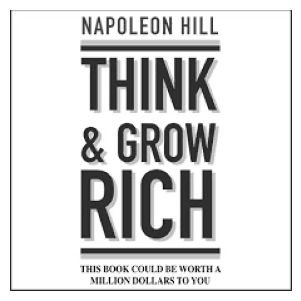

In [35]:
display("./temp/grayscale.png")

In [59]:
thresh , im_bw = cv2.threshold(gray_image,210,240,cv2.THRESH_BINARY)
print(thresh)
cv2.imwrite("temp/bw_image.png",im_bw)

210.0


True

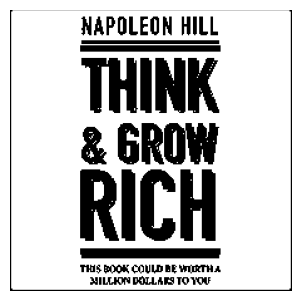

In [60]:
display("temp/bw_image.png")

In [61]:
# more difficult for humans to read , certain things might be easy for machines

#### Noise : It is pixels which dont corrosponds to text is called noise 


## consider noise removal only when till im_bw image result is yet required to get better        (if 95% >accuracy then no need)

### 4. Noise Removal

In [67]:
def noise_removal(image):
    import numpy as np
    kernel = np.ones((1,1),np.uint8)    ## central component for ML 1st arg :- size (size of how we capturing noise)  
    image = cv2.dilate(image,kernel,iterations=1)
    kernel2 = np.ones((1,1),np.uint8)
    image = cv2.erode(image,kernel,iterations=1)
    image = cv2.morphologyEx(image,cv2.MORPH_CLOSE,kernel)
    image = cv2.medianBlur(image,3)
    return (image)

In [68]:
no_noise = noise_removal(im_bw)
cv2.imwrite("temp/no_noise.jpg",no_noise)

True

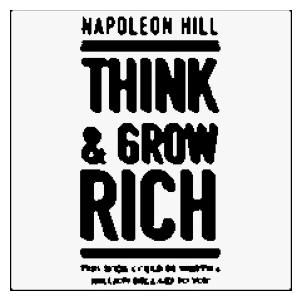

In [70]:
display("temp/no_noise.jpg")

## what would we do if we have thick letters , thin letters ??

### 5. Dilation and Erosion

In [71]:
# for adjusting font sizing 


In [90]:
# we need inverted image here 
def thin_font(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((1,3),np.uint8)
    image = cv2.erode(image,kernel , iterations =1)
    image = cv2.bitwise_not(image)
    return (image)

In [91]:
eroded_image = thin_font(no_noise)
cv2.imwrite("temp/eroded_image.jpg",eroded_image)

True

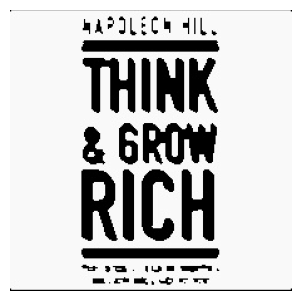

In [92]:
display("temp/eroded_image.jpg")